# Module 5 : Performance measurements of Logistic Regression

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = p.read_csv('crop.csv')

In [4]:
df = data.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['label']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='label', axis=1)
#Response variable
y = df.loc[:,'label']    

In [7]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  1540
Number of test dataset:  660
Total number of dataset:  2200


In [8]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

LogR = LogisticRegression(random_state=42)
LogR.fit(X_train, y_train)


predictNB = LogR.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictNB))

print("")
cm1=confusion_matrix(y_test,predictNB)
print('Confusion Matrix result of Naive Bayes is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(LogR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of LogisticRegression is:",accuracy.mean() * 100)
VC=accuracy.mean() * 100


Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.87      0.90      0.89        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.88      0.93      0.90        30
           7       1.00      1.00      1.00        30
           8       0.90      0.90      0.90        30
           9       1.00      1.00      1.00        30
          10       0.97      0.97      0.97        30
          11       0.93      0.87      0.90        30
          12       1.00      1.00      1.00        30
          13       0.91      0.97      0.94        30
          14       1.00      0.97      0.98        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00

In [11]:
def graph():
    import matplotlib.pyplot as plt
    data=[VC]
    alg="Naive Bayes"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("y"))
    plt.title("Accuracy comparison of Crop Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)

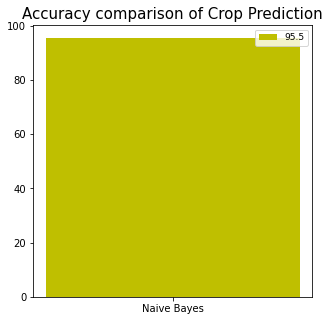

In [12]:
graph()

In [13]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 30
True Negative : 0
False Positive : 0
False Negative : 30

True Positive Rate : 0.5
True Negative Rate : nan
False Positive Rate : nan
False Negative Rate : 0.5

Positive Predictive Value : 1.0
Negative predictive value : 0.0


Confusion matrix-Naive Bayes:
[[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0]
 [ 0

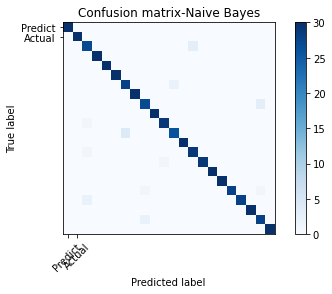

In [14]:
def plot_confusion_matrix(cm1, title='Confusion matrix-Naive Bayes', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictNB)
print('Confusion matrix-Naive Bayes:')
print(cm1)
plot_confusion_matrix(cm1)

### Importing module as a pkl file

In [ ]:
# import joblib
# joblib.dump(gnb,'nb.pkl')